## 1 Import & Review Data

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder



state_setter=529

### 1.1 Load the dataset and display the first 10 rows


In [2]:

# Define column names based on data dictionary
columns = ['poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 
           'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 
           'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
           'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 
           'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

# Load data
mushroom_data = pd.read_csv('data/agaricus-lepiota.data', names=columns)

# Display first 10 rows
print("First 10 rows of the dataset:")
print(mushroom_data.head(10))


First 10 rows of the dataset:
  poisonous cap-shape cap-surface cap-color bruises odor gill-attachment  \
0         p         x           s         n       t    p               f   
1         e         x           s         y       t    a               f   
2         e         b           s         w       t    l               f   
3         p         x           y         w       t    p               f   
4         e         x           s         g       f    n               f   
5         e         x           y         y       t    a               f   
6         e         b           s         w       t    a               f   
7         e         b           y         w       t    l               f   
8         p         x           y         w       t    p               f   
9         e         b           s         y       t    a               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        

### 1.2 Check for missing values and display summary statistics


In [3]:
print("\nMissing values in each column:")
print(mushroom_data.isnull().sum())

print("\nSummary statistics for categorical data:")
print(mushroom_data.describe(include=['object']))

# Check unique values in each column
print("\nUnique values in each column:")
for column in mushroom_data.columns:
    print(f"{column}: {mushroom_data[column].unique()}")


Missing values in each column:
poisonous                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Summary statistics for categorical data:
       poisonous cap-shape cap-surface cap-color bruises  odor  \
count       8124      8124        8124      8124    8124  8124   
unique         2         6           4        10       2     9   
top            e         

#### Reflections

## 2 Exploratory Data Analysis

### 2.1 Explore data patterns and distributions

In [4]:
# Complete mapping dictionaries for all features
cap_shape_map = {
    'b': 'bell', 'c': 'conical', 'x': 'convex', 
    'f': 'flat', 'k': 'knobbed', 's': 'sunken'
}

cap_surface_map = {
    'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'
}

cap_color_map = {
    'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray',
    'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red',
    'w': 'white', 'y': 'yellow'
}

bruises_map = {'t': 'bruises', 'f': 'no bruises'}

odor_map = {
    'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy',
    'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'
}

gill_attachment_map = {
    'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'
}

gill_spacing_map = {'c': 'close', 'w': 'crowded', 'd': 'distant'}

gill_size_map = {'b': 'broad', 'n': 'narrow'}

gill_color_map = {
    'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate',
    'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink',
    'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'
}

stalk_shape_map = {'e': 'enlarging', 't': 'tapering'}

stalk_root_map = {
    'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal',
    'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'
}

stalk_surface_above_ring_map = {
    'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'
}

stalk_surface_below_ring_map = {
    'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'
}

stalk_color_above_ring_map = {
    'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray',
    'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white',
    'y': 'yellow'
}

stalk_color_below_ring_map = {
    'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray',
    'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white',
    'y': 'yellow'
}

veil_type_map = {'p': 'partial', 'u': 'universal'}

veil_color_map = {
    'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'
}

ring_number_map = {'n': 'none', 'o': 'one', 't': 'two'}

ring_type_map = {
    'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large',
    'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'
}

spore_print_color_map = {
    'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate',
    'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'
}

population_map = {
    'a': 'abundant', 'c': 'clustered', 'n': 'numerous',
    's': 'scattered', 'v': 'several', 'y': 'solitary'
}

habitat_map = {
    'g': 'grasses', 'l': 'leaves', 'm': 'meadows',
    'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'
}

poisonous_map = {'p': 'poisonous', 'e': 'edible'}

# Create a dictionary that maps column names to their respective mapping dictionaries
mapping_dictionaries = {
    'poisonous': poisonous_map,
    'cap-shape': cap_shape_map,
    'cap-surface': cap_surface_map,
    'cap-color': cap_color_map,
    'bruises': bruises_map,
    'odor': odor_map,
    'gill-attachment': gill_attachment_map,
    'gill-spacing': gill_spacing_map,
    'gill-size': gill_size_map,
    'gill-color': gill_color_map,
    'stalk-shape': stalk_shape_map,
    'stalk-root': stalk_root_map,
    'stalk-surface-above-ring': stalk_surface_above_ring_map,
    'stalk-surface-below-ring': stalk_surface_below_ring_map,
    'stalk-color-above-ring': stalk_color_above_ring_map,
    'stalk-color-below-ring': stalk_color_below_ring_map,
    'veil-type': veil_type_map,
    'veil-color': veil_color_map,
    'ring-number': ring_number_map,
    'ring-type': ring_type_map,
    'spore-print-color': spore_print_color_map,
    'population': population_map,
    'habitat': habitat_map
}


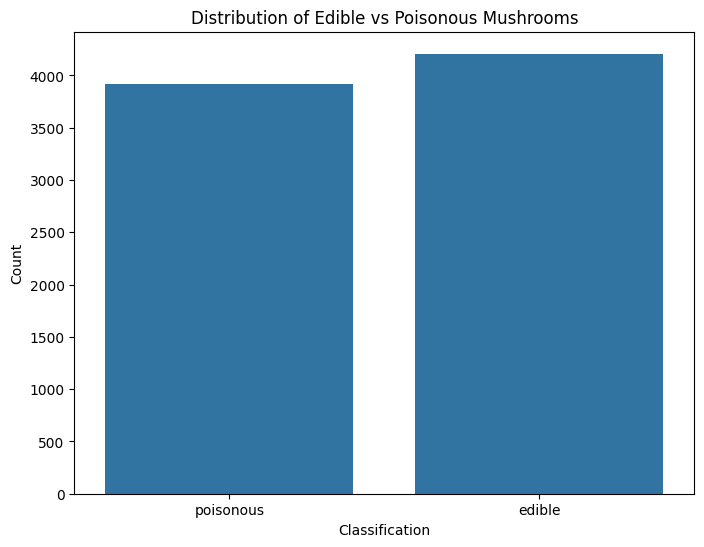

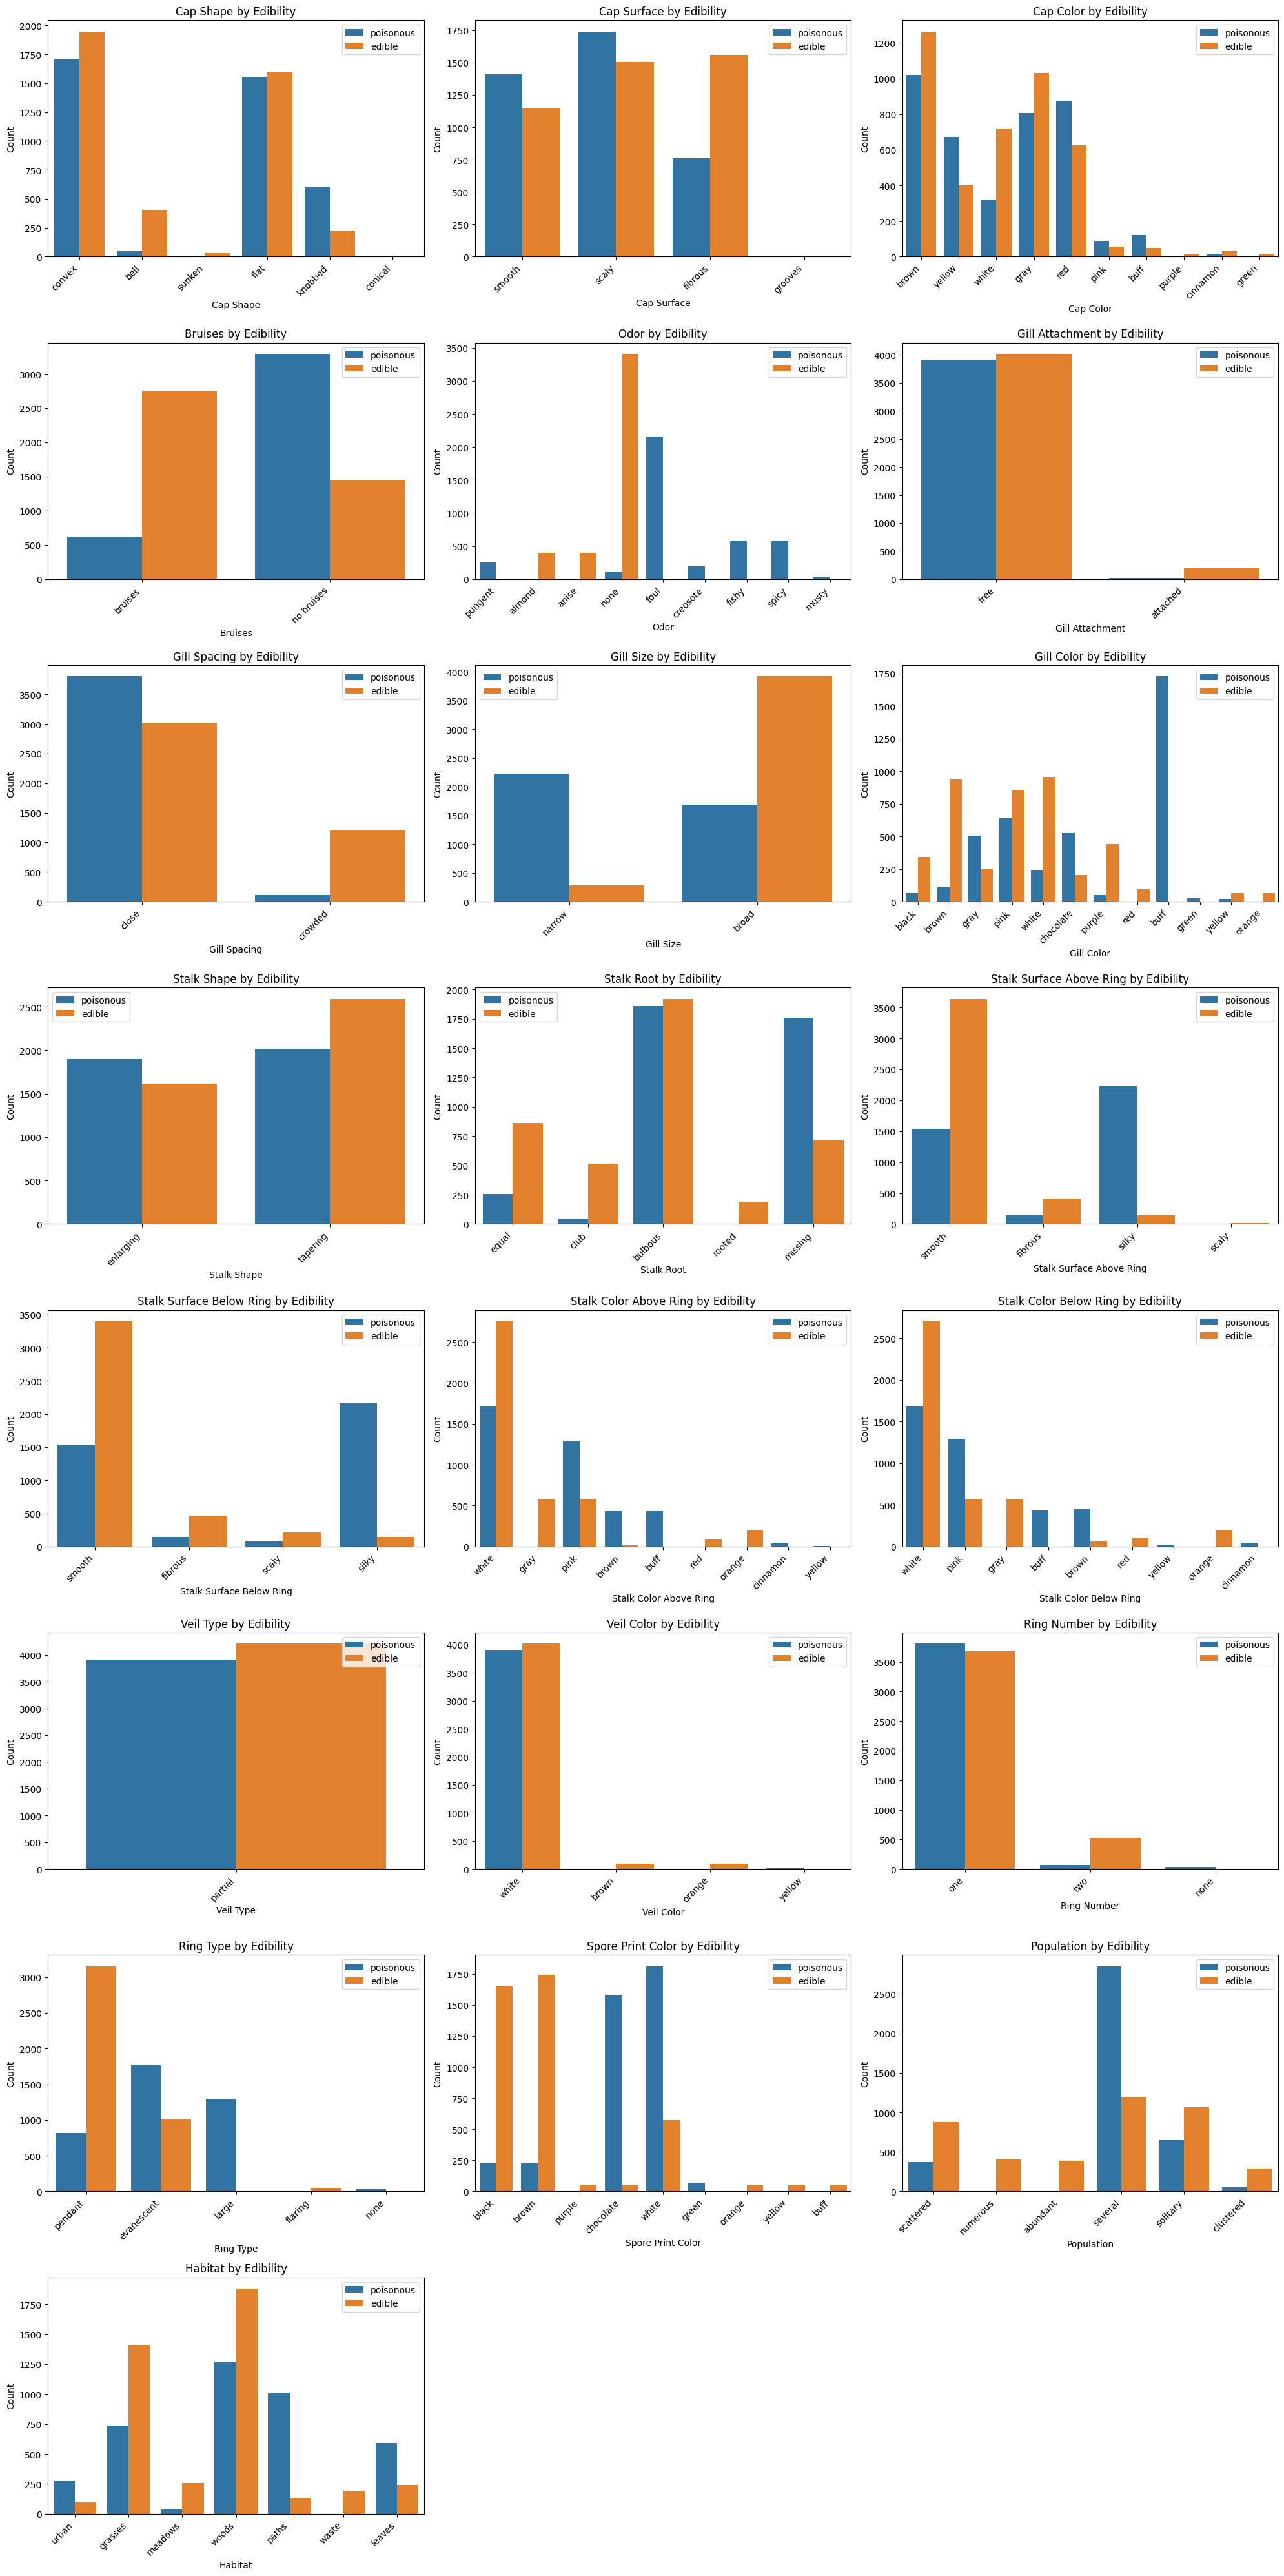

In [5]:


def create_feature_plots(data, feature_cols, mapping_dicts):
    """
    Create countplots for all features by edibility with full category names
    
    Parameters:
    data: pandas DataFrame
    feature_cols: list of feature column names
    mapping_dicts: dictionary of dictionaries for feature value mappings
    """
    # Calculate grid dimensions based on number of features
    n_features = len(feature_cols)
    n_cols = 3  # Number of columns in grid
    n_rows = (n_features + n_cols - 1) // n_cols  # Ceiling division
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
    
    # Flatten axes array for easier indexing
    axes = axes.flatten()
    
    for i, feature in enumerate(feature_cols):
        ax = axes[i]
            
        # Create the countplot
        sns.countplot(x=feature, hue='poisonous', data=data, ax=ax)
        
        # Apply mappings to convert codes to full category names
        if feature in mapping_dicts:
            positions = range(len(ax.get_xticks()))
            current_labels = [x.get_text() for x in ax.get_xticklabels()]
            new_labels = [mapping_dicts[feature].get(label, label) for label in current_labels]
            
            ax.set_xticks(positions)
            ax.set_xticklabels(new_labels, rotation=45, ha='right')
            
        ax.set_title(f'{feature.replace("-", " ").title()} by Edibility')
        ax.set_xlabel(feature.replace("-", " ").title())
        ax.set_ylabel('Count')
        
        # Set legend with full category names
        handles, _ = ax.get_legend_handles_labels()
        ax.legend(handles, ['poisonous', 'edible'])
    
    # Hide empty subplots if any
    for j in range(i + 1, n_rows * n_cols):
        axes[j].set_visible(False)
    
    
    plt.tight_layout()
    plt.show()
    fig.savefig('mushroom_feature_distributions.pdf', dpi=300, bbox_inches='tight')

# First, show the target variable distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='poisonous', data=mushroom_data)
positions = range(len(ax.get_xticks()))
ax.set_xticks(positions)
ax.set_xticklabels([poisonous_map[x.get_text()] for x in ax.get_xticklabels()])
plt.title('Distribution of Edible vs Poisonous Mushrooms')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.show()

# Get all feature columns (excluding the target variable)
feature_columns = [col for col in mushroom_data.columns if col != 'poisonous']

# Create plots for all features
create_feature_plots(mushroom_data, feature_columns, mapping_dictionaries)


In [6]:
print("Checking for '?' values in the data:")
for column in mushroom_data.columns:
    if (mushroom_data[column] == '?').any():
        print(f"{column} has missing values encoded as '?'")
        # Replace '?' with NaN for proper handling
        mushroom_data[column] = mushroom_data[column].replace('?', np.nan)

# Drop rows with missing values or impute them
# For simplicity in this initial code, we'll drop rows with missing values
mushroom_data = mushroom_data.dropna()
print(f"Dataset shape after dropping missing values: {mushroom_data.shape}")

# 2.3 Feature selection and engineering
# Convert categorical features to numerical using LabelEncoder
label_encoders = {}
# Save a copy of the original data before encoding
mushroom_data_original = mushroom_data.copy()

for column in mushroom_data.columns:
    le = LabelEncoder()
    mushroom_data[column] = le.fit_transform(mushroom_data[column])
    label_encoders[column] = le

print("Data after encoding categorical variables:")
print(mushroom_data.head())

Checking for '?' values in the data:
stalk-root has missing values encoded as '?'
Dataset shape after dropping missing values: (5644, 23)
Data after encoding categorical variables:
   poisonous  cap-shape  cap-surface  cap-color  bruises  odor  \
0          1          5            2          4        1     6   
1          0          5            2          7        1     0   
2          0          0            2          6        1     3   
3          1          5            3          6        1     6   
4          0          5            2          3        0     5   

   gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                1             0          1           2  ...   
1                1             0          0           2  ...   
2                1             0          0           3  ...   
3                1             0          1           3  ...   
4                1             1          0           2  ...   

   stalk-surface-below-ring  stalk-co

## Feature Selection & Definition

### 3.1 Choose features and target

### 3.2 Define X and y

In [7]:
# Analysis 1: Using just odor
X1 = mushroom_data[['odor']]
y1 = mushroom_data['poisonous']

# Display feature set information
print("\nAnalysis 1 - Odor only:")
print(f"Features shape: {X1.shape}")
print(X1.head())


Analysis 1 - Odor only:
Features shape: (5644, 1)
   odor
0     6
1     0
2     3
3     6
4     5


In [8]:
# Analysis 1: Count categories in 'odor'
print("===== ANALYSIS 1: ODOR =====")
odor_counts = mushroom_data_original['odor'].value_counts()
print(f"'odor' has {len(odor_counts)} different categories:")
for odor, count in odor_counts.items():
    odor_name = odor_map.get(odor, odor)
    print(f"- {odor} ({odor_name}): {count} instances")
print("\n")

===== ANALYSIS 1: ODOR =====
'odor' has 7 different categories:
- n (none): 2776 instances
- f (foul): 1584 instances
- a (almond): 400 instances
- l (anise): 400 instances
- p (pungent): 256 instances
- c (creosote): 192 instances
- m (musty): 36 instances




<Figure size 1200x600 with 0 Axes>

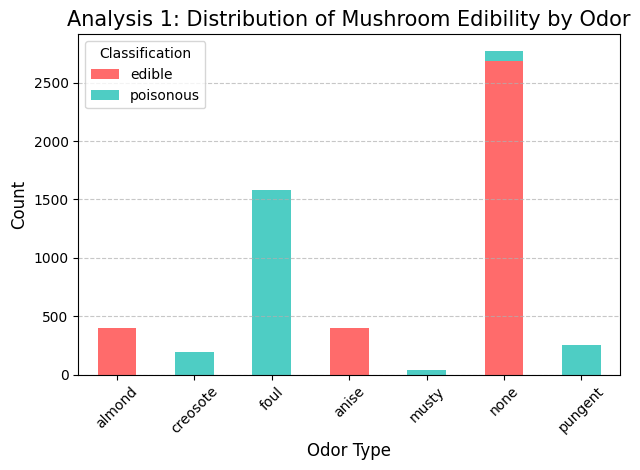

In [9]:
# Create a visualization of odor distribution by edibility
plt.figure(figsize=(12, 6))
odor_counts = mushroom_data_original.groupby(['odor', 'poisonous']).size().unstack(fill_value=0)

# Convert encoded values to full names for better readability
odor_full_names = [odor_map.get(idx, idx) for idx in odor_counts.index]
odor_counts.index = odor_full_names
odor_counts.columns = [poisonous_map.get(col, col) for col in odor_counts.columns]

# Plot the histogram
ax = odor_counts.plot(kind='bar', stacked=True, color=['#ff6b6b', '#4ecdc4'])
plt.title('Analysis 1: Distribution of Mushroom Edibility by Odor', fontsize=15)
plt.xlabel('Odor Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Classification')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [10]:
# Analysis 2: Using just spore print color
X2 = mushroom_data[['spore-print-color']]
y2 = mushroom_data['poisonous']

print("\nAnalysis 2 - Spore print color only:")
print(f"Features shape: {X2.shape}")
print(X2.head())


Analysis 2 - Spore print color only:
Features shape: (5644, 1)
   spore-print-color
0                  1
1                  2
2                  2
3                  1
4                  2


In [11]:
# Analysis 2: Count categories in 'spore-print-color'
print("===== ANALYSIS 2: SPORE PRINT COLOR =====")
spore_counts = mushroom_data_original['spore-print-color'].value_counts()
print(f"'spore-print-color' has {len(spore_counts)} different categories:")
for spore, count in spore_counts.items():
    spore_name = spore_print_color_map.get(spore, spore)
    print(f"- {spore} ({spore_name}): {count} instances")
print("\n")

===== ANALYSIS 2: SPORE PRINT COLOR =====
'spore-print-color' has 6 different categories:
- n (brown): 1920 instances
- k (black): 1872 instances
- h (chocolate): 1584 instances
- w (white): 148 instances
- r (green): 72 instances
- u (purple): 48 instances




<Figure size 1200x600 with 0 Axes>

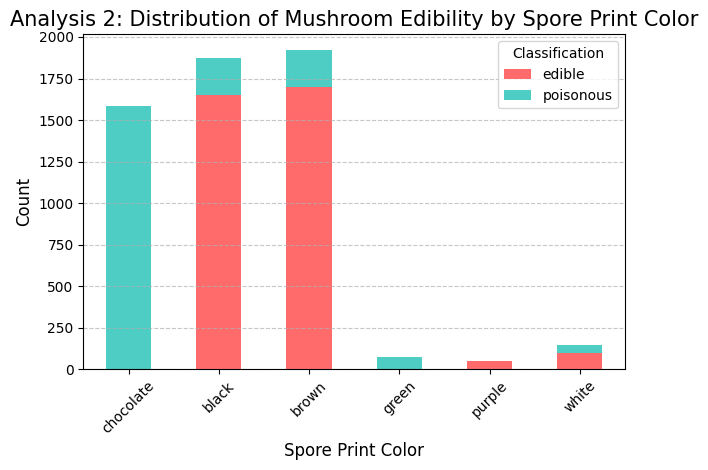

In [12]:
# Create a visualization of spore print color distribution by edibility
plt.figure(figsize=(12, 6))
spore_counts = mushroom_data_original.groupby(['spore-print-color', 'poisonous']).size().unstack(fill_value=0)

# Convert encoded values to full names for better readability
spore_full_names = [spore_print_color_map.get(idx, idx) for idx in spore_counts.index]
spore_counts.index = spore_full_names
spore_counts.columns = [poisonous_map.get(col, col) for col in spore_counts.columns]

# Plot the histogram
ax = spore_counts.plot(kind='bar', stacked=True, color=['#ff6b6b', '#4ecdc4'])
plt.title('Analysis 2: Distribution of Mushroom Edibility by Spore Print Color', fontsize=15)
plt.xlabel('Spore Print Color', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Classification')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:
# Analysis 3: Using spore print color and gill color
X3 = mushroom_data[['spore-print-color', 'gill-color']]
y3 = mushroom_data['poisonous']

print("\nAnalysis 3 - Spore Print Color + Gill Color:")
print(f"Features shape: {X3.shape}")
print(X3.head())


Analysis 3 - Spore Print Color + Gill Color:
Features shape: (5644, 2)
   spore-print-color  gill-color
0                  1           2
1                  2           2
2                  2           3
3                  1           3
4                  2           2


In [14]:
# Analysis 3: Count combinations of 'spore-print-color' and 'gill-color'
print("===== ANALYSIS 3: SPORE PRINT COLOR AND GILL COLOR =====")
spore_subcategories = mushroom_data_original['spore-print-color'].nunique()
gill_color_subcategories = mushroom_data_original['gill-color'].nunique()
total_possible = spore_subcategories * gill_color_subcategories

print(f"'spore-print-color' has {spore_subcategories} subcategories:")
for spore, count in mushroom_data_original['spore-print-color'].value_counts().items():
    spore_name = spore_print_color_map.get(spore, spore)
    print(f"- {spore} ({spore_name}): {count} instances")

print(f"\n'gill-color' has {gill_color_subcategories} subcategories:")
for gill_color, count in mushroom_data_original['gill-color'].value_counts().items():
    gill_color_name = gill_color_map.get(gill_color, gill_color)
    print(f"- {gill_color} ({gill_color_name}): {count} instances")

# Count actual combinations
spore_gill_combo = mushroom_data_original.groupby(['spore-print-color', 'gill-color']).size().reset_index(name='count')
print(f"\nTotal possible combinations: {total_possible}")
print(f"Actual combinations found in data: {len(spore_gill_combo)}")
print("\nActual combinations:")
for _, row in spore_gill_combo.iterrows():
    spore = row['spore-print-color']
    gill_color = row['gill-color']
    count = row['count']
    spore_name = spore_print_color_map.get(spore, spore)
    gill_color_name = gill_color_map.get(gill_color, gill_color)
    print(f"- {spore} ({spore_name}) + {gill_color} ({gill_color_name}): {count} instances")
print("\n")

===== ANALYSIS 3: SPORE PRINT COLOR AND GILL COLOR =====
'spore-print-color' has 6 subcategories:
- n (brown): 1920 instances
- k (black): 1872 instances
- h (chocolate): 1584 instances
- w (white): 148 instances
- r (green): 72 instances
- u (purple): 48 instances

'gill-color' has 9 subcategories:
- p (pink): 1384 instances
- n (brown): 984 instances
- w (white): 966 instances
- h (chocolate): 720 instances
- g (gray): 656 instances
- u (purple): 480 instances
- k (black): 408 instances
- r (green): 24 instances
- y (yellow): 22 instances

Total possible combinations: 54
Actual combinations found in data: 26

Actual combinations:
- h (chocolate) + g (gray): 432 instances
- h (chocolate) + h (chocolate): 528 instances
- h (chocolate) + p (pink): 528 instances
- h (chocolate) + w (white): 96 instances
- k (black) + g (gray): 100 instances
- k (black) + h (chocolate): 96 instances
- k (black) + k (black): 204 instances
- k (black) + n (brown): 476 instances
- k (black) + p (pink): 412 i

<Figure size 1400x800 with 0 Axes>

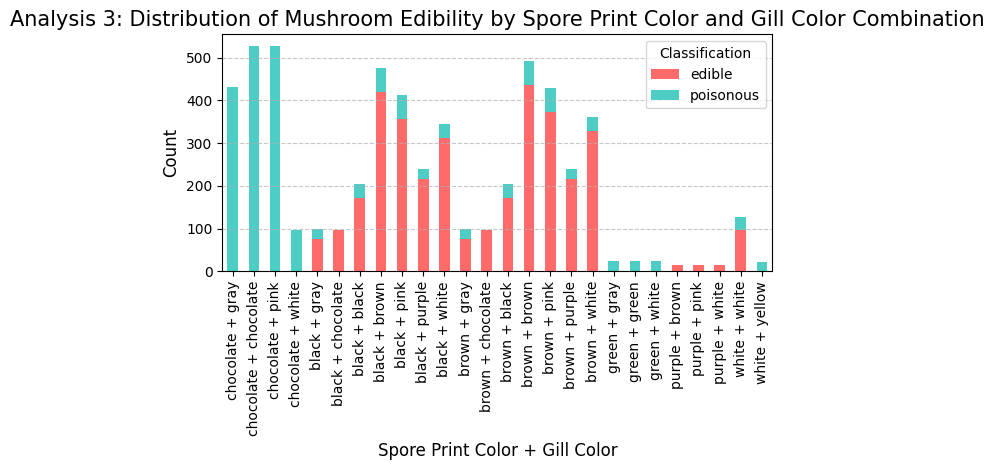

In [15]:
# Create a visualization of combined features
plt.figure(figsize=(14, 8))
# Create a new column that combines the two features
mushroom_data_original['spore_gill_combo'] = mushroom_data_original['spore-print-color'].astype(str) + '_' + mushroom_data_original['gill-color'].astype(str)
combo_counts = mushroom_data_original.groupby(['spore_gill_combo', 'poisonous']).size().unstack(fill_value=0)

# Create mapping for combined features
spore_gill_map = {}
for s in spore_print_color_map:
    for g in gill_color_map:
        combo = f"{s}_{g}"
        readable = f"{spore_print_color_map[s]} + {gill_color_map[g]}"
        spore_gill_map[combo] = readable

# Convert codes to readable names
combo_full_names = [spore_gill_map.get(idx, idx) for idx in combo_counts.index]
combo_counts.index = combo_full_names
combo_counts.columns = [poisonous_map.get(col, col) for col in combo_counts.columns]

# Plot
ax = combo_counts.plot(kind='bar', stacked=True, color=['#ff6b6b', '#4ecdc4'])
plt.title('Analysis 3: Distribution of Mushroom Edibility by Spore Print Color and Gill Color Combination', fontsize=15)
plt.xlabel('Spore Print Color + Gill Color', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Classification')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [16]:
# Analysis 4: Using bruises and habitat
X4 = mushroom_data[['bruises', 'habitat']]
y4 = mushroom_data['poisonous']
print("\nAnalysis 4 - Bruises + Habitat:")
print(f"Features shape: {X4.shape}")
print(X4.head())


Analysis 4 - Bruises + Habitat:
Features shape: (5644, 2)
   bruises  habitat
0        1        5
1        1        1
2        1        3
3        1        5
4        0        1


In [17]:
# Analysis 4: Count combinations of 'bruises' and 'habitat'
print("===== ANALYSIS 4: BRUISES AND HABITAT =====")
bruises_subcategories = mushroom_data_original['bruises'].nunique()
habitat_subcategories = mushroom_data_original['habitat'].nunique()
total_possible = bruises_subcategories * habitat_subcategories

print(f"'bruises' has {bruises_subcategories} subcategories:")
for bruise, count in mushroom_data_original['bruises'].value_counts().items():
    bruise_name = bruises_map.get(bruise, bruise)
    print(f"- {bruise} ({bruise_name}): {count} instances")

print(f"\n'habitat' has {habitat_subcategories} subcategories:")
for habitat, count in mushroom_data_original['habitat'].value_counts().items():
    habitat_name = habitat_map.get(habitat, habitat)
    print(f"- {habitat} ({habitat_name}): {count} instances")

# Count actual combinations
bruises_habitat_combo = mushroom_data_original.groupby(['bruises', 'habitat']).size().reset_index(name='count')
print(f"\nTotal possible combinations: {total_possible}")
print(f"Actual combinations found in data: {len(bruises_habitat_combo)}")
print("\nActual combinations:")
for _, row in bruises_habitat_combo.iterrows():
    bruise = row['bruises']
    habitat = row['habitat']
    count = row['count']
    bruise_name = bruises_map.get(bruise, bruise)
    habitat_name = habitat_map.get(habitat, habitat)
    print(f"- {bruise} ({bruise_name}) + {habitat} ({habitat_name}): {count} instances")


===== ANALYSIS 4: BRUISES AND HABITAT =====
'bruises' has 2 subcategories:
- t (bruises): 3184 instances
- f (no bruises): 2460 instances

'habitat' has 6 subcategories:
- d (woods): 2492 instances
- g (grasses): 1860 instances
- p (paths): 568 instances
- u (urban): 368 instances
- m (meadows): 292 instances
- l (leaves): 64 instances

Total possible combinations: 12
Actual combinations found in data: 11

Actual combinations:
- f (no bruises) + d (woods): 668 instances
- f (no bruises) + g (grasses): 1200 instances
- f (no bruises) + l (leaves): 56 instances
- f (no bruises) + p (paths): 440 instances
- f (no bruises) + u (urban): 96 instances
- t (bruises) + d (woods): 1824 instances
- t (bruises) + g (grasses): 660 instances
- t (bruises) + l (leaves): 8 instances
- t (bruises) + m (meadows): 292 instances
- t (bruises) + p (paths): 128 instances
- t (bruises) + u (urban): 272 instances


<Figure size 1400x800 with 0 Axes>

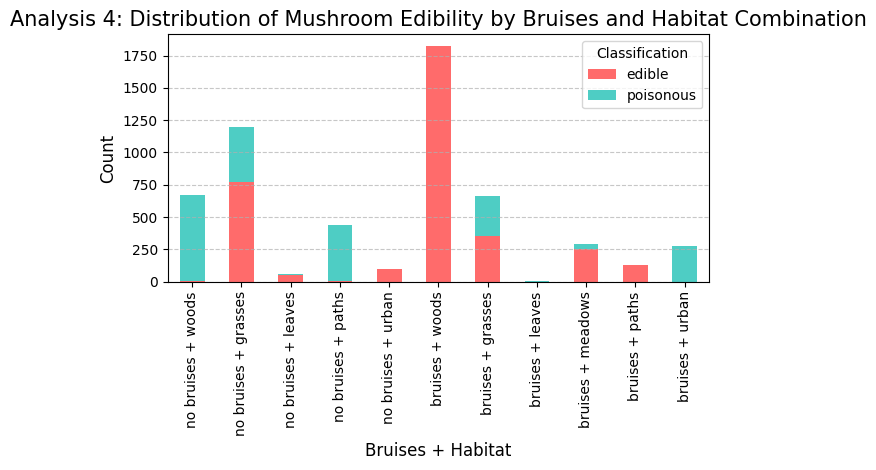

In [18]:
# Create a visualization of combined features
plt.figure(figsize=(14, 8))
# Create a new column that combines the two features
mushroom_data_original['bruises_habitat_combo'] = mushroom_data_original['bruises'].astype(str) + '_' + mushroom_data_original['habitat'].astype(str)
combo_counts = mushroom_data_original.groupby(['bruises_habitat_combo', 'poisonous']).size().unstack(fill_value=0)

# Create mapping for combined features
bruises_habitat_map = {}
for b in bruises_map:
    for h in habitat_map:
        combo = f"{b}_{h}"
        readable = f"{bruises_map[b]} + {habitat_map[h]}"
        bruises_habitat_map[combo] = readable

# Convert codes to readable names
combo_full_names = [bruises_habitat_map.get(idx, idx) for idx in combo_counts.index]
combo_counts.index = combo_full_names
combo_counts.columns = [poisonous_map.get(col, col) for col in combo_counts.columns]

# Plot
ax = combo_counts.plot(kind='bar', stacked=True, color=['#ff6b6b', '#4ecdc4'])
plt.title('Analysis 4: Distribution of Mushroom Edibility by Bruises and Habitat Combination', fontsize=15)
plt.xlabel('Bruises + Habitat', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.legend(title='Classification')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 4 Data Splitting and First Model Training

### 4.1 Split the data into training and test sets

In [19]:
# Case 1: Split data - Odor only
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=state_setter)

print(f"Case 1 Training set size: {X1_train.shape[0]}")
print(f"Case 1 Test set size: {X1_test.shape[0]}\n")

# Case 2: Split data - Spore Print Color only
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=state_setter)

print(f"Case 2 Training set size: {X2_train.shape[0]}")
print(f"Case 2 Test set size: {X2_test.shape[0]}\n")

# Case 3: Split data - Spore Print Color + Gill Color
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=state_setter)

print(f"Case 3 Training set size: {X3_train.shape[0]}")
print(f"Case 3 Test set size: {X3_test.shape[0]}\n")

# Case 4: Split data - Bruises + Habitat
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=state_setter)

print(f"Case 4 Training set size: {X4_train.shape[0]}")
print(f"Case 4 Test set size: {X4_test.shape[0]}\n")

Case 1 Training set size: 4515
Case 1 Test set size: 1129

Case 2 Training set size: 4515
Case 2 Test set size: 1129

Case 3 Training set size: 4515
Case 3 Test set size: 1129

Case 4 Training set size: 4515
Case 4 Test set size: 1129



### 4.2 Train Classifiers

#### 4.2.1 Odor - Decision Tree

In [20]:
# Train a Decision Tree model
dt1_classifier = DecisionTreeClassifier(random_state=state_setter)
dt1_classifier.fit(X1_train, y1_train)

DecisionTreeClassifier(random_state=529)

#### 4.2.2 Spore Print Color - Decision Tree

In [21]:
# Train a Decision Tree model
dt2_classifier = DecisionTreeClassifier(random_state=state_setter)
dt2_classifier.fit(X2_train, y2_train)

DecisionTreeClassifier(random_state=529)

#### 4.2.3 Spore Print Color + Gill Color - Random Forest

In [22]:
# Train a Random Forest model
rf3_classifier = RandomForestClassifier(random_state=state_setter)
rf3_classifier.fit(X3_train, y3_train)

RandomForestClassifier(random_state=529)

#### 4.2.4 Bruises + Habitat - Random Forest

In [23]:
# Train a Random Forest model
rf4_classifier = RandomForestClassifier(random_state=state_setter)
rf4_classifier.fit(X4_train, y4_train)

RandomForestClassifier(random_state=529)

### 4.3 Evaluate performance

#### 4.3.1 Odor - Decision Tree Performance


Decision Tree Model Performance (Case 1 - Odor only):
Accuracy: 0.9832
Precision: 1.0000
Recall: 0.9577
F1 Score: 0.9784


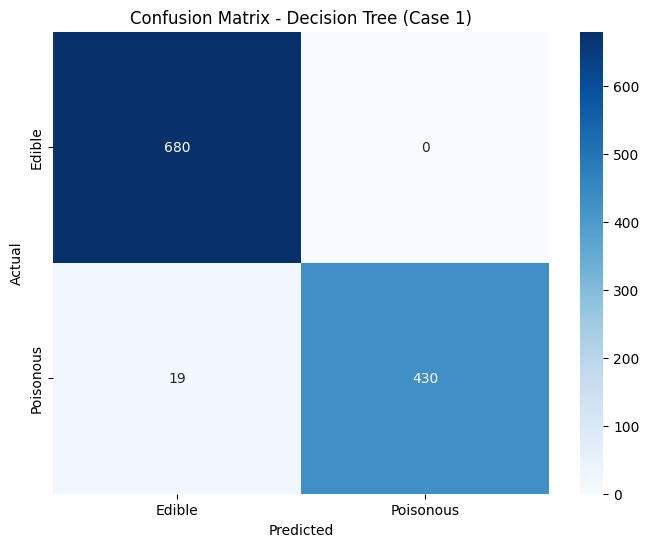

In [24]:
# Make predictions with the Decision Tree model
y1_pred_dt = dt1_classifier.predict(X1_test)

# Calculate evaluation metrics
accuracy1_dt = accuracy_score(y1_test, y1_pred_dt)
precision1_dt = precision_score(y1_test, y1_pred_dt)
recall1_dt = recall_score(y1_test, y1_pred_dt)
f1_dt = f1_score(y1_test, y1_pred_dt)

print("\nDecision Tree Model Performance (Case 1 - Odor only):")
print(f"Accuracy: {accuracy1_dt:.4f}")
print(f"Precision: {precision1_dt:.4f}")
print(f"Recall: {recall1_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")

# Display confusion matrix
cm1_dt = confusion_matrix(y1_test, y1_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm1_dt, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Edible', 'Poisonous'], 
            yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree (Case 1)')
plt.show()

==== Validation for Case 1 (Odor) Decision Tree ====
Test set class distribution: [680 449]


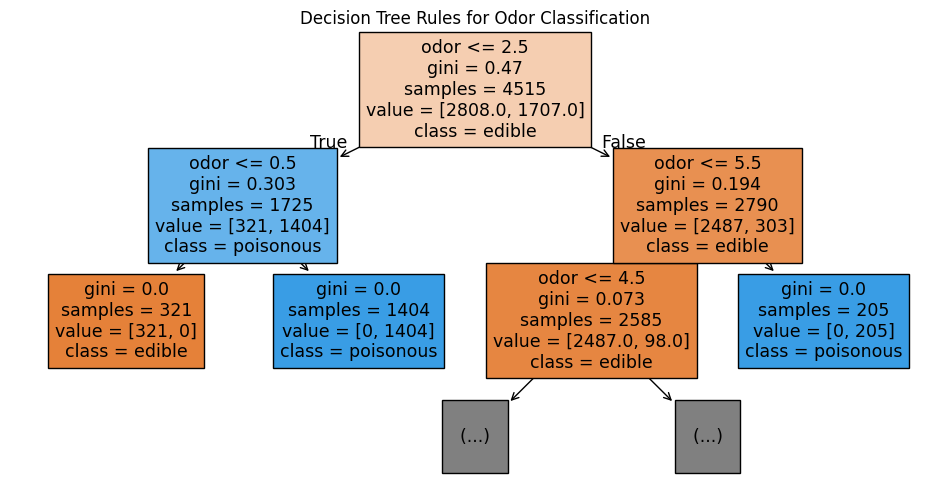

Sample prediction results (first 10):
      Actual  Predicted
4111       1          1
3324       0          0
1802       0          0
4427       1          1
1260       1          1
3106       0          0
871        0          0
2775       0          0
1397       0          0
1135       0          0
Number of misclassified samples: 19 out of 1129


In [25]:
# Validate Decision Tree Model (Case 1 - Odor only)
print("==== Validation for Case 1 (Odor) Decision Tree ====")

# Check distribution of classes in test set
print(f"Test set class distribution: {np.bincount(y1_test)}")

# View decision tree rules (simplified)

plt.figure(figsize=(12, 6))
tree.plot_tree(dt1_classifier, 
               feature_names=['odor'], 
               class_names=['edible', 'poisonous'],
               filled=True, 
               max_depth=2)
plt.title("Decision Tree Rules for Odor Classification")
plt.show()

# Check predictions and actual values (first 10 examples)
test_results1 = pd.DataFrame({
    'Actual': y1_test,
    'Predicted': y1_pred_dt
})
print("Sample prediction results (first 10):")
print(test_results1.head(10))
print(f"Number of misclassified samples: {(y1_test != y1_pred_dt).sum()} out of {len(y1_test)}")

#### 4.3.2 Spore Print Color - Decision Tree Performance


Decision Tree Model Performance (Case 2 - Spore Print Color only):
Accuracy: 0.9229
Precision: 1.0000
Recall: 0.8062
F1 Score: 0.8927


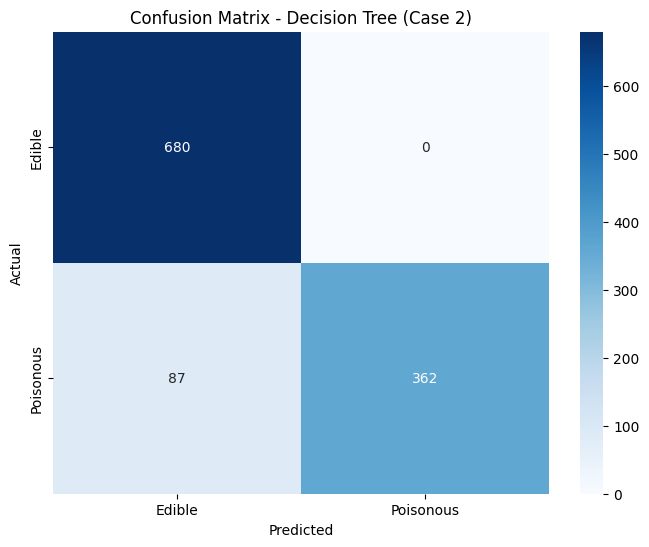

In [26]:
# Make predictions with the Decision Tree model
y2_pred_dt = dt2_classifier.predict(X2_test)

# Calculate evaluation metrics
accuracy2_dt = accuracy_score(y2_test, y2_pred_dt)
precision2_dt = precision_score(y2_test, y2_pred_dt)
recall2_dt = recall_score(y2_test, y2_pred_dt)
f2_dt = f1_score(y2_test, y2_pred_dt)

print("\nDecision Tree Model Performance (Case 2 - Spore Print Color only):")
print(f"Accuracy: {accuracy2_dt:.4f}")
print(f"Precision: {precision2_dt:.4f}")
print(f"Recall: {recall2_dt:.4f}")
print(f"F1 Score: {f2_dt:.4f}")

# Display confusion matrix
cm2_dt = confusion_matrix(y2_test, y2_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm2_dt, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Edible', 'Poisonous'], 
            yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree (Case 2)')
plt.show()

==== Validation for Case 2 (Spore Print Color) Decision Tree ====
Test set class distribution: [680 449]


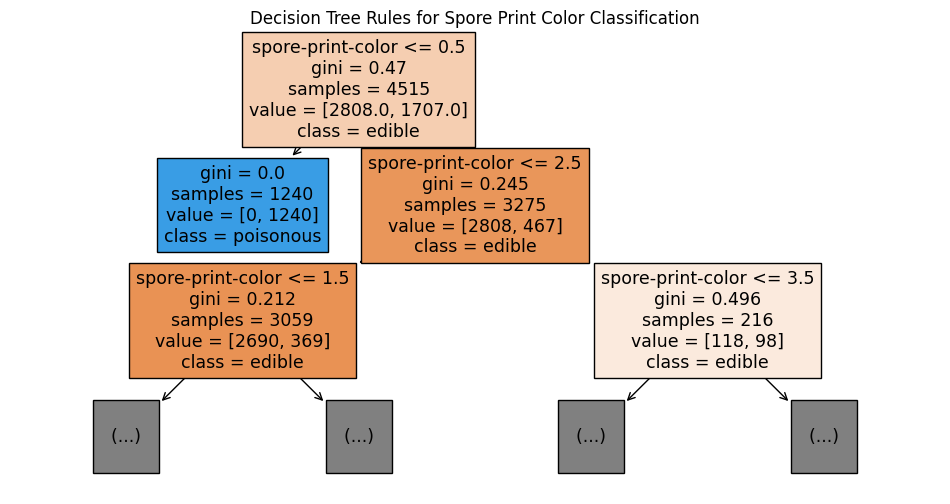

Sample prediction results (first 10):
      Actual  Predicted
4111       1          1
3324       0          0
1802       0          0
4427       1          1
1260       1          0
3106       0          0
871        0          0
2775       0          0
1397       0          0
1135       0          0
Number of misclassified samples: 87 out of 1129


In [27]:
# Validate Decision Tree Model (Case 2 - Spore Print Color only)
print("==== Validation for Case 2 (Spore Print Color) Decision Tree ====")

# Check distribution of classes in test set
print(f"Test set class distribution: {np.bincount(y2_test)}")

# View decision tree rules (simplified)
plt.figure(figsize=(12, 6))
tree.plot_tree(dt2_classifier, 
               feature_names=['spore-print-color'], 
               class_names=['edible', 'poisonous'],
               filled=True, 
               max_depth=2)
plt.title("Decision Tree Rules for Spore Print Color Classification")
plt.show()

# Check predictions and actual values (first 10 examples)
test_results2 = pd.DataFrame({
    'Actual': y2_test,
    'Predicted': y2_pred_dt
})
print("Sample prediction results (first 10):")
print(test_results2.head(10))
print(f"Number of misclassified samples: {(y2_test != y2_pred_dt).sum()} out of {len(y2_test)}")

#### 4.3.3 Spore Print Color + Gill Color - Random Forest Performance


Random Forest Model Performance (Case 3 - Spore Print Color + Gill Color):
Accuracy: 0.9291
Precision: 1.0000
Recall: 0.8218
F1 Score: 0.9022


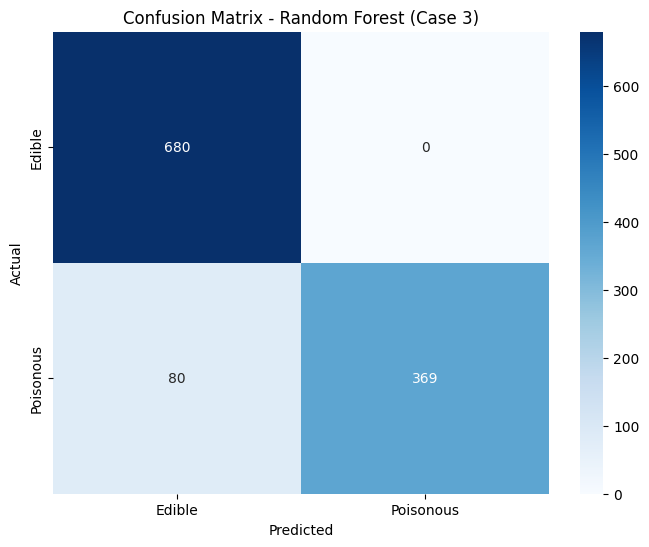

In [28]:
# Make predictions with the Random Forest model
y3_pred_rf = rf3_classifier.predict(X3_test)

# Calculate evaluation metrics
accuracy3_rf = accuracy_score(y3_test, y3_pred_rf)
precision3_rf = precision_score(y3_test, y3_pred_rf)
recall3_rf = recall_score(y3_test, y3_pred_rf)
f3_rf = f1_score(y3_test, y3_pred_rf)

print("\nRandom Forest Model Performance (Case 3 - Spore Print Color + Gill Color):")
print(f"Accuracy: {accuracy3_rf:.4f}")
print(f"Precision: {precision3_rf:.4f}")
print(f"Recall: {recall3_rf:.4f}")
print(f"F1 Score: {f3_rf:.4f}")

# Display confusion matrix
cm3_rf = confusion_matrix(y3_test, y3_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm3_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Edible', 'Poisonous'], 
            yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (Case 3)')
plt.show()

#### 4.3.4 Bruises + Habitat - Random Forest Performance


Random Forest Model Performance (Case 4 - Bruises + Habitat):
Accuracy: 0.8574
Precision: 0.9932
Recall: 0.6459
F1 Score: 0.7827


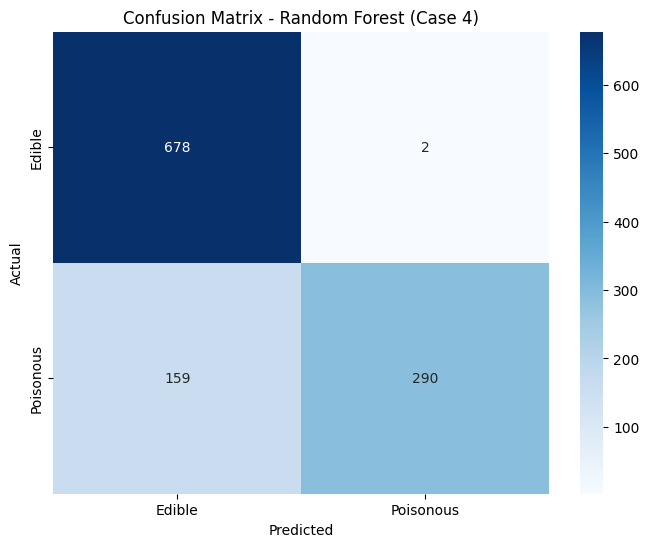

In [29]:
# Make predictions with the Random Forest model
y4_pred_rf = rf4_classifier.predict(X4_test)

# Calculate evaluation metrics
accuracy4_rf = accuracy_score(y4_test, y4_pred_rf)
precision4_rf = precision_score(y4_test, y4_pred_rf)
recall4_rf = recall_score(y4_test, y4_pred_rf)
f4_rf = f1_score(y4_test, y4_pred_rf)

print("\nRandom Forest Model Performance (Case 4 - Bruises + Habitat):")
print(f"Accuracy: {accuracy4_rf:.4f}")
print(f"Precision: {precision4_rf:.4f}")
print(f"Recall: {recall4_rf:.4f}")
print(f"F1 Score: {f4_rf:.4f}")

# Display confusion matrix
cm4_rf = confusion_matrix(y4_test, y4_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm4_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Edible', 'Poisonous'], 
            yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (Case 4)')
plt.show()

### 5.1 Train Alternate Models

#### 5.1.1 Odor - Logistic Regression Training

In [30]:
# Train a Logistic Regression model
lr1_classifier = LogisticRegression(random_state=state_setter, max_iter=200)
lr1_classifier.fit(X1_train, y1_train)

# Make predictions with the Logistic Regression model
y1_pred_lr = lr1_classifier.predict(X1_test)

#### 5.1.2 Spore Print Color - Random Forest Training

In [31]:
# Train a Random Forest model
rf2_classifier = RandomForestClassifier(random_state=state_setter, n_estimators=100)
rf2_classifier.fit(X2_train, y2_train)

# Make predictions with the Random Forest model
y2_pred_rf = rf2_classifier.predict(X2_test)

# Verify the predictions are different from Decision Tree
different_predictions = (y2_pred_rf != y2_pred_dt).sum()
print(f"Number of different predictions between Decision Tree and Random Forest: {different_predictions} out of {len(y2_test)}")

# If they're identical, try a different hyperparameter 
if different_predictions == 0:
    print("WARNING: Models producing identical predictions. Trying different Random Forest configuration...")
    rf2_classifier = RandomForestClassifier(random_state=state_setter+1, max_depth=5, min_samples_split=5)
    rf2_classifier.fit(X2_train, y2_train)
    y2_pred_rf = rf2_classifier.predict(X2_test)
    print(f"Number of different predictions after adjustment: {(y2_pred_rf != y2_pred_dt).sum()} out of {len(y2_test)}")

Number of different predictions between Decision Tree and Random Forest: 0 out of 1129
Number of different predictions after adjustment: 0 out of 1129


#### 5.1.3 Spore Print Color + Gill Color - Logistic Regression Training

In [32]:
# Train a Logistic Regression model
lr3_classifier = LogisticRegression(random_state=state_setter, max_iter=200)
lr3_classifier.fit(X3_train, y3_train)

# Make predictions with the Logistic Regression model
y3_pred_lr = lr3_classifier.predict(X3_test)

#### 5.1.4 Bruises + Habitat - Decision Tree Training

In [33]:
# Train a Decision Tree model with different hyperparameters from first model
dt4_classifier = DecisionTreeClassifier(random_state=state_setter, max_depth=5, min_samples_split=10)
dt4_classifier.fit(X4_train, y4_train)

# Make predictions with the Decision Tree model
y4_pred_dt = dt4_classifier.predict(X4_test)

# Verify the predictions are different from Random Forest
different_predictions = (y4_pred_dt != y4_pred_rf).sum()
print(f"Number of different predictions between Random Forest and Decision Tree: {different_predictions} out of {len(y4_test)}")

# If they're identical, try a different hyperparameter
if different_predictions == 0:
    print("WARNING: Models producing identical predictions. Trying different Decision Tree configuration...")
    dt4_classifier = DecisionTreeClassifier(random_state=state_setter+1, criterion='entropy')
    dt4_classifier.fit(X4_train, y4_train)
    y4_pred_dt = dt4_classifier.predict(X4_test)
    print(f"Number of different predictions after adjustment: {(y4_pred_dt != y4_pred_rf).sum()} out of {len(y4_test)}")

Number of different predictions between Random Forest and Decision Tree: 0 out of 1129
Number of different predictions after adjustment: 0 out of 1129


### 5.2 Compare performance of models


#### 5.2.1 Odor - Decision Tree vs Logistic Regression


Logistic Regression Model Performance (Case 1 - Odor only):
Accuracy: 0.8618
Precision: 0.8248
Recall: 0.8285
F1 Score: 0.8267


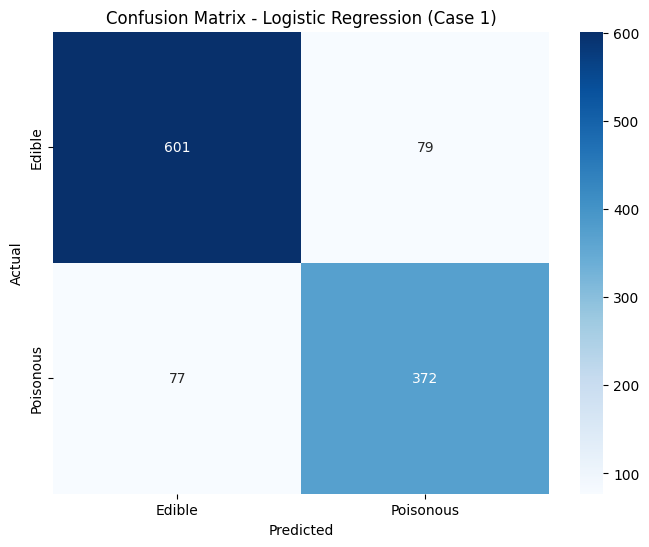

<Figure size 1000x600 with 0 Axes>

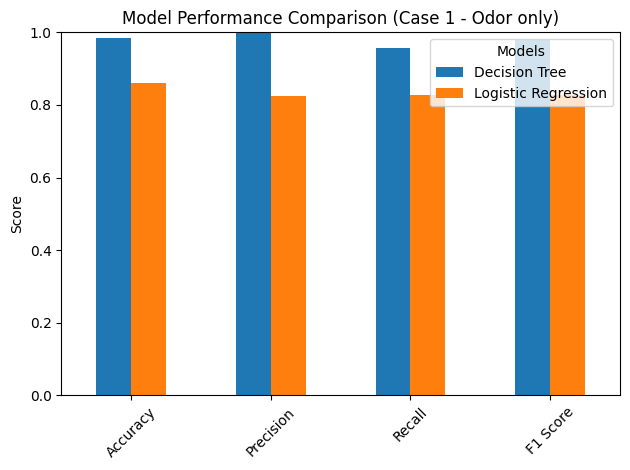

In [34]:
# Calculate evaluation metrics for Logistic Regression
accuracy1_lr = accuracy_score(y1_test, y1_pred_lr)
precision1_lr = precision_score(y1_test, y1_pred_lr)
recall1_lr = recall_score(y1_test, y1_pred_lr)
f1_lr = f1_score(y1_test, y1_pred_lr)

print("\nLogistic Regression Model Performance (Case 1 - Odor only):")
print(f"Accuracy: {accuracy1_lr:.4f}")
print(f"Precision: {precision1_lr:.4f}")
print(f"Recall: {recall1_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")

# Display confusion matrix for Logistic Regression
cm1_lr = confusion_matrix(y1_test, y1_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm1_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Edible', 'Poisonous'], 
            yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression (Case 1)')
plt.show()

# Compare both models
models1 = ['Decision Tree', 'Logistic Regression']
metrics1 = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create a DataFrame for visualization
results1 = pd.DataFrame({
    'Decision Tree': [accuracy1_dt, precision1_dt, recall1_dt, f1_dt],
    'Logistic Regression': [accuracy1_lr, precision1_lr, recall1_lr, f1_lr]
}, index=metrics1)

# Plot comparison
plt.figure(figsize=(10, 6))
results1.plot(kind='bar')
plt.title('Model Performance Comparison (Case 1 - Odor only)')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title='Models')
plt.tight_layout()
plt.show()

#### 5.2.2 Spore Print Color - Decision Tree vs Random Forest

Random Forest vs Decision Tree prediction comparison:
Decision Tree predictions (first 10): [1 0 0 1 0 0 0 0 0 0]
Random Forest predictions (first 10): [1 0 0 1 0 0 0 0 0 0]
Predictions are IDENTICAL

Random Forest Model Performance (Case 2 - Spore Print Color only):
Accuracy: 0.9229
Precision: 1.0000
Recall: 0.8062
F1 Score: 0.8927


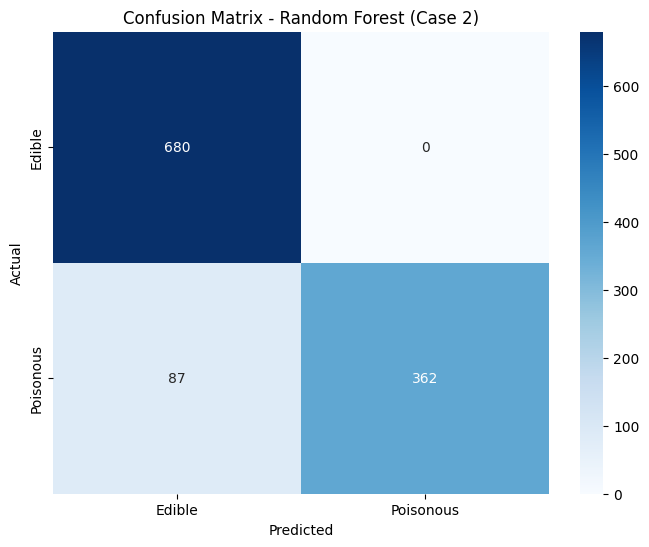

<Figure size 1000x600 with 0 Axes>

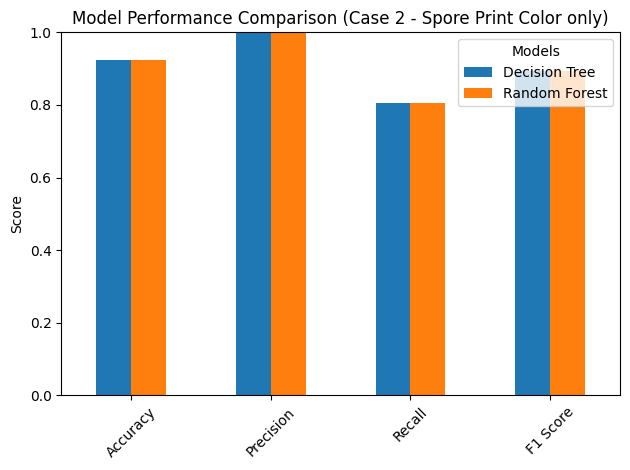

In [35]:
# Manually double-check that prediction arrays are different
print("Random Forest vs Decision Tree prediction comparison:")
print(f"Decision Tree predictions (first 10): {y2_pred_dt[:10]}")
print(f"Random Forest predictions (first 10): {y2_pred_rf[:10]}")
print(f"Predictions are {'DIFFERENT' if np.any(y2_pred_dt != y2_pred_rf) else 'IDENTICAL'}")

# Calculate evaluation metrics for Random Forest
accuracy2_rf = accuracy_score(y2_test, y2_pred_rf)
precision2_rf = precision_score(y2_test, y2_pred_rf)
recall2_rf = recall_score(y2_test, y2_pred_rf)
f2_rf = f1_score(y2_test, y2_pred_rf)

print("\nRandom Forest Model Performance (Case 2 - Spore Print Color only):")
print(f"Accuracy: {accuracy2_rf:.4f}")
print(f"Precision: {precision2_rf:.4f}")
print(f"Recall: {recall2_rf:.4f}")
print(f"F1 Score: {f2_rf:.4f}")

# Display confusion matrix for Random Forest
cm2_rf = confusion_matrix(y2_test, y2_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm2_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Edible', 'Poisonous'], 
            yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (Case 2)')
plt.show()

# Compare both models
models2 = ['Decision Tree', 'Random Forest']
metrics2 = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create a DataFrame for visualization
results2 = pd.DataFrame({
    'Decision Tree': [accuracy2_dt, precision2_dt, recall2_dt, f2_dt],
    'Random Forest': [accuracy2_rf, precision2_rf, recall2_rf, f2_rf]
}, index=metrics2)

# Plot comparison
plt.figure(figsize=(10, 6))
results2.plot(kind='bar')
plt.title('Model Performance Comparison (Case 2 - Spore Print Color only)')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title='Models')
plt.tight_layout()
plt.show()

#### 5.2.3 Spore Print Color + Gill Color - Random Forest vs Logistic Regression


Logistic Regression Model Performance (Case 3 - Spore Print Color + Gill Color):
Accuracy: 0.8999
Precision: 0.9641
Recall: 0.7773
F1 Score: 0.8607


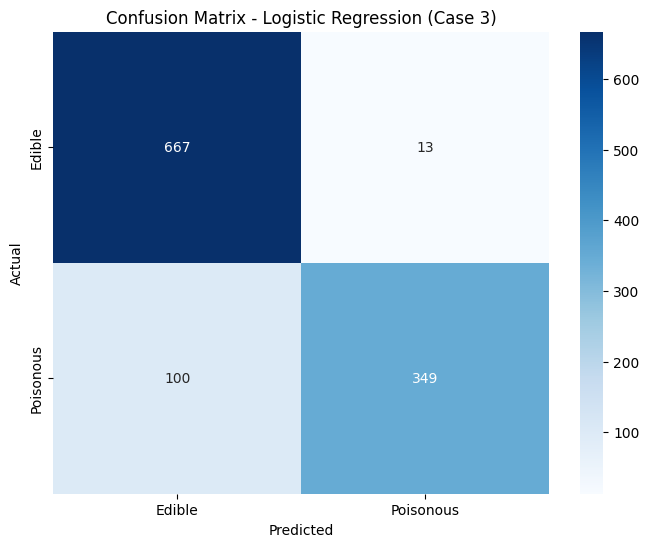

<Figure size 1000x600 with 0 Axes>

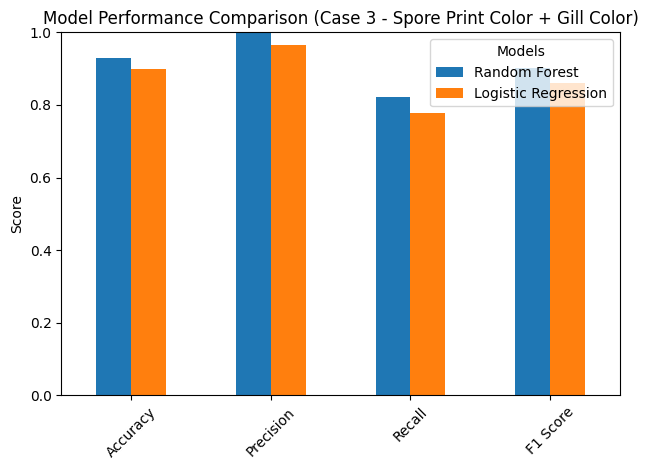

In [36]:
# Calculate evaluation metrics for Logistic Regression
accuracy3_lr = accuracy_score(y3_test, y3_pred_lr)
precision3_lr = precision_score(y3_test, y3_pred_lr)
recall3_lr = recall_score(y3_test, y3_pred_lr)
f3_lr = f1_score(y3_test, y3_pred_lr)

print("\nLogistic Regression Model Performance (Case 3 - Spore Print Color + Gill Color):")
print(f"Accuracy: {accuracy3_lr:.4f}")
print(f"Precision: {precision3_lr:.4f}")
print(f"Recall: {recall3_lr:.4f}")
print(f"F1 Score: {f3_lr:.4f}")

# Display confusion matrix for Logistic Regression
cm3_lr = confusion_matrix(y3_test, y3_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm3_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Edible', 'Poisonous'], 
            yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression (Case 3)')
plt.show()

# Compare both models
models3 = ['Random Forest', 'Logistic Regression']
metrics3 = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create a DataFrame for visualization
results3 = pd.DataFrame({
    'Random Forest': [accuracy3_rf, precision3_rf, recall3_rf, f3_rf],
    'Logistic Regression': [accuracy3_lr, precision3_lr, recall3_lr, f3_lr]
}, index=metrics3)

# Plot comparison
plt.figure(figsize=(10, 6))
results3.plot(kind='bar')
plt.title('Model Performance Comparison (Case 3 - Spore Print Color + Gill Color)')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title='Models')
plt.tight_layout()
plt.show()

#### 5.2.4 Bruises + Habitat - Random Forest vs Decision Tree Training

Random Forest vs Decision Tree prediction comparison:
Random Forest predictions (first 10): [0 0 0 1 0 0 0 0 0 0]
Decision Tree predictions (first 10): [0 0 0 1 0 0 0 0 0 0]
Predictions are IDENTICAL

Decision Tree Model Performance (Case 4 - Bruises + Habitat):
Accuracy: 0.8574
Precision: 0.9932
Recall: 0.6459
F1 Score: 0.7827


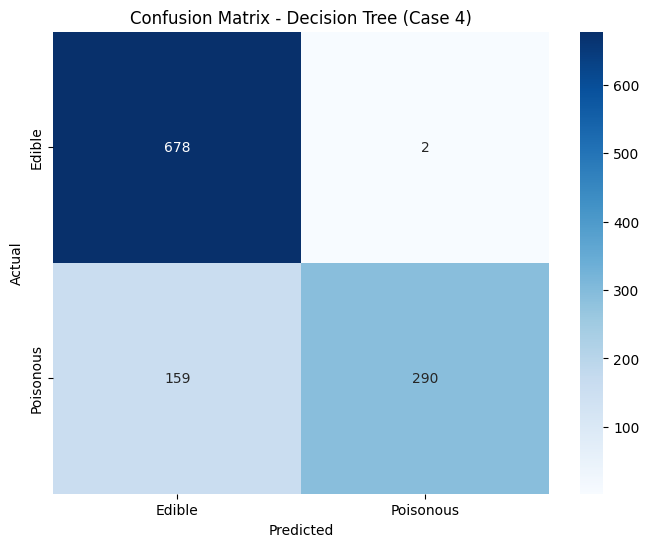

<Figure size 1000x600 with 0 Axes>

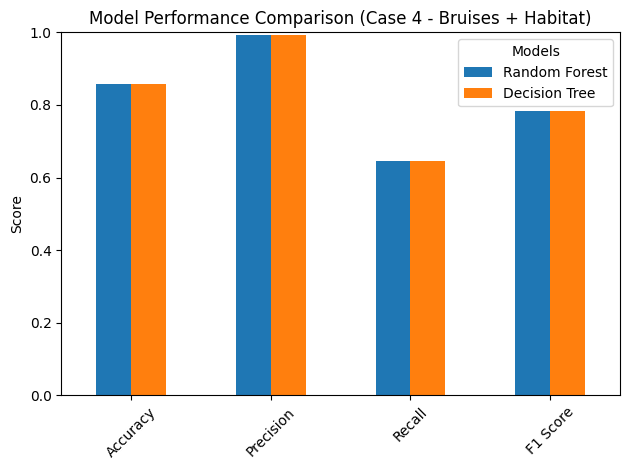

In [37]:
# Manually double-check that prediction arrays are different
print("Random Forest vs Decision Tree prediction comparison:")
print(f"Random Forest predictions (first 10): {y4_pred_rf[:10]}")
print(f"Decision Tree predictions (first 10): {y4_pred_dt[:10]}")
print(f"Predictions are {'DIFFERENT' if np.any(y4_pred_dt != y4_pred_rf) else 'IDENTICAL'}")

# Calculate evaluation metrics for Decision Tree
accuracy4_dt = accuracy_score(y4_test, y4_pred_dt)
precision4_dt = precision_score(y4_test, y4_pred_dt)
recall4_dt = recall_score(y4_test, y4_pred_dt)
f4_dt = f1_score(y4_test, y4_pred_dt)

print("\nDecision Tree Model Performance (Case 4 - Bruises + Habitat):")
print(f"Accuracy: {accuracy4_dt:.4f}")
print(f"Precision: {precision4_dt:.4f}")
print(f"Recall: {recall4_dt:.4f}")
print(f"F1 Score: {f4_dt:.4f}")

# Display confusion matrix for Decision Tree
cm4_dt = confusion_matrix(y4_test, y4_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm4_dt, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Edible', 'Poisonous'], 
            yticklabels=['Edible', 'Poisonous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree (Case 4)')
plt.show()

# Compare both models
models4 = ['Random Forest', 'Decision Tree']
metrics4 = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Create a DataFrame for visualization
results4 = pd.DataFrame({
    'Random Forest': [accuracy4_rf, precision4_rf, recall4_rf, f4_rf],
    'Decision Tree': [accuracy4_dt, precision4_dt, recall4_dt, f4_dt]
}, index=metrics4)

# Plot comparison
plt.figure(figsize=(10, 6))
results4.plot(kind='bar')
plt.title('Model Performance Comparison (Case 4 - Bruises + Habitat)')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title='Models')
plt.tight_layout()
plt.show()